In [3]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
#######################################
# Script que permite crear gráfica histórica
# a partir de datos de precipitación de la NASA
# Author: Jorge Mauricio
# Email: jorge.ernesto.mauricio@gmail.com
# Date: 2018-02-01
# Version: 1.0
#######################################
Created on Mon Jul 17 16:17:25 2017
@author: jorgemauricio
"""
# librerias
import pandas as pd
import os
import math
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# limpiar la terminal
os.system('clear')

# path de archivos
# Linux path = "/home/jorge/Documents/Research/proyectoGranizo"
path = "/home/jorge/Documents/Research/proyectoGranizo"

# nombre del archivo
nombreTemporalArchivo = "{}/data/compilado_datos_NASA.csv".format(path)

# leer csv
data = pd.read_csv(nombreTemporalArchivo)

In [5]:
data.head()

,Unnamed: 0,Canon,Estado,Nombre,Long,Lat,Year,Month,Day,Hour,RainIMR
0,0,1,MICH,La Alberca,-102.006289,19.474989,2014,12,13,450,0.0
1,1,2,MICH,El Costo,-102.064453,19.448556,2014,12,13,450,0.0
2,2,3,MICH,El Fresno,-102.083000,19.492444,2014,12,13,450,0.0
3,3,4,MICH,Pajas 1,-102.061333,19.500167,2014,12,13,450,0.0
4,4,5,MICH,Pajas 2,-102.056250,19.510333,2014,12,13,450,0.0


In [7]:
def generarFecha(y,m,d,h):
        return "{}-{}-{} {}".format(y,complementarValor(m),complementarValor(d),h)

def complementarValor(v):
    if v < 10:
        return "0{}".format(v)
    else:
        return "{}".format(v)

def generarHora(h):
    hour = int(h / 60)
    if hour < 10:
        hour = "0{}".format(hour)
    minutes = h % 60
    if minutes < 10:
        minutes = "0{}".format(minutes)
    return "{}:{}".format(hour, minutes)

/home/jorge/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/jorge/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/jorge/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

Graph: La Alberca
Graph: El Costo
Graph: El Fresno


KeyboardInterrupt: 

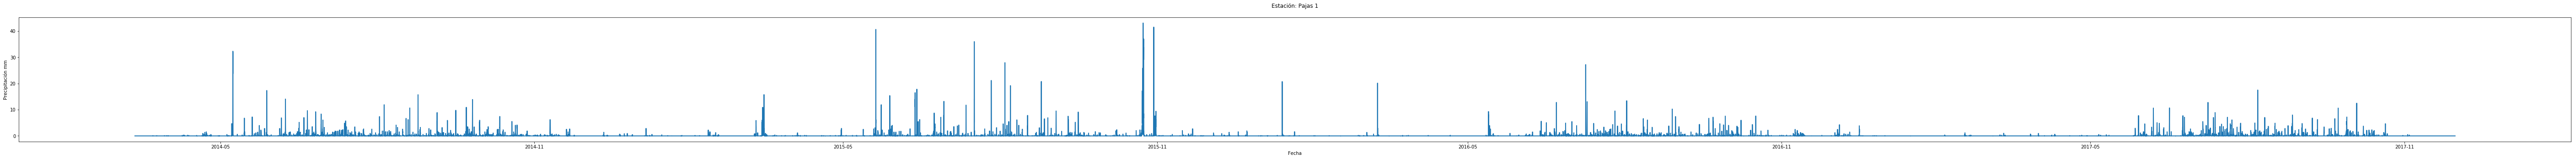

In [11]:
for i in data["Nombre"].unique():
    dataTemp = data.loc[data["Nombre"] == i]
    
    dataTemp["Hora"] = dataTemp.apply(lambda x: generarHora(x["Hour"]), axis=1)
    dataTemp["Fecha"] = dataTemp.apply(lambda x: generarFecha(x["Year"], x["Month"], x["Day"], x["Hora"]), axis=1)
    dataTemp['Fecha'] = dataTemp['Fecha'].astype('datetime64[ns]')
    dataTemp = dataTemp.sort_values(by="Fecha")
    dataTemp.index = dataTemp["Fecha"]
    dataTemp.index = pd.to_datetime(dataTemp.index)
    
    #iniciar gráfica
    plt.clf()
    
    # configurar tamaño de gráfica
    fig = plt.figure(figsize=(100,5))
    ax = fig.add_subplot(111)

    # obtener x, y , e
    x = np.array(dataTemp.index)
    y = np.array(dataTemp["RainIMR"])

    # configurar línea
    line, = ax.plot(x, y, lw=2)

    # generar títulos
    tituloGrafica = "Estación: {}\n".format(i)

    # configurar títulos
    ax.set_xlabel("Fecha")
    ax.set_ylabel("Precipitación mm")
    ax.set_title(tituloGrafica)
    
    # guardar gráfica
    nombreTemporalGrafica = "data/graphs/{}_historica.png".format(i)
    plt.savefig(nombreTemporalGrafica, dpi=600)
    
    #print 
    print("Graph: {}".format(i))

In [12]:
!ls -l data

total 3568088
-rw-rw-r-- 1 jorge jorge 219359874 mar  9 10:52 compilado_datos_NASA.csv
-rw-rw-r-- 1 jorge jorge      2037 mar  2 14:30 Coordenadas_caniones.csv
-rw-rw-r-- 1 jorge jorge   8372215 feb 28 22:50 dataEstacionFresno.csv
-rw-rw-r-- 1 jorge jorge  46124550 mar  6 22:06 dataFromCanionesTestNASA_2014.csv
-rw-rw-r-- 1 jorge jorge  56696895 mar  7 23:22 dataFromCanionesTestNASA_2015.csv
-rw-rw-r-- 1 jorge jorge  56744086 mar  8 01:56 dataFromCanionesTestNASA_2016.csv
-rw-rw-r-- 1 jorge jorge  51879077 mar  7 12:09 dataFromCanionesTestNASA_2017.csv
-rw-rw-r-- 1 jorge jorge 325209159 mar 11 12:24 data_wrf_nasa.csv
-rw-rw-r-- 1 jorge jorge 157246818 mar  2 19:30 datos_inteporlados_1hr_wrf.csv
-rw-rw-r-- 1 jorge jorge 317351588 mar  6 21:13 datos_inteporlados_30min_wrf.csv
-rw-rw-r-- 1 jorge jorge 358614202 mar  9 16:37 datos_interpolados_30_min_con_formato_wrf.csv
drwxrwxr-x 2 jorge jorge     20480 mar 12 15:04 graphs
drwxrwxr-x 2 jorge jorge      4096 mar  2 16:15 hdf5
drwxrwxr-x 2 

In [13]:
data = pd.read_csv("data/compilado_datos_NASA.csv")


In [14]:
data.head()


,Unnamed: 0,Canon,Estado,Nombre,Long,Lat,Year,Month,Day,Hour,RainIMR
0,0,1,MICH,La Alberca,-102.006289,19.474989,2014,12,13,450,0.0
1,1,2,MICH,El Costo,-102.064453,19.448556,2014,12,13,450,0.0
2,2,3,MICH,El Fresno,-102.083000,19.492444,2014,12,13,450,0.0
3,3,4,MICH,Pajas 1,-102.061333,19.500167,2014,12,13,450,0.0
4,4,5,MICH,Pajas 2,-102.056250,19.510333,2014,12,13,450,0.0


In [19]:
import math
import random

In [39]:
numero = random.randint(90,99) / 100
generado = math.sin(numero)
print(numero)
print(generado)

0.91
0.7895037396899505


In [17]:
math.cos(.95)

0.5816830894638836

In [45]:
def generar_area_de_influencia(r):
    numero = random.randint(90,99) / 100
    return r * numero

In [43]:
data.describe()["RainIMR"]

count    3.328566e+06
mean     8.452005e-02
std      8.157930e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      5.000000e+01
Name: RainIMR, dtype: float64

In [49]:
data["areaRain"] = data.apply(lambda x: generar_area_de_influencia(x["RainIMR"]), axis=1)

In [50]:
data.describe()[["RainIMR","areaRain"]]

,RainIMR,areaRain
count,3.328566e+06,3.328566e+06
mean,8.452005e-02,7.988363e-02
std,8.157930e-01,7.714775e-01
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00
max,5.000000e+01,4.950000e+01


In [51]:
data.to_csv("data/compilado_NASA_area_influencia.csv")